In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 4s 1us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [62]:
y_test.shape

(10000,)

In [9]:
X_train.shape

(60000, 28, 28)

In [16]:
class_names[y_train[2]]

'T-shirt/top'

In [10]:
def plot_sample(index):
    plt.figure(figsize = (50,1))
    plt.imshow(X_train[index])

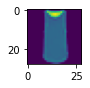

In [14]:
plot_sample(2)

In [19]:
y_train[0]

9

In [17]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [65]:
def get_model(hidden_layers=1):
    layers = [keras.layers.Flatten(input_shape=(28, 28))]

    for i in range(hidden_layers):
        layers.append(keras.layers.Dense(500, activation='relu'),)
   
    layers.append(keras.layers.Dense(10, activation='sigmoid'))

    model = keras.Sequential(layers)    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [66]:
model = get_model(1)
model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 25s 5ms/step - loss: 0.5912 - accuracy: 0.7889
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3757 - accuracy: 0.8635
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3219 - accuracy: 0.8835
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2999 - accuracy: 0.8893
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2785 - accuracy: 0.8968


In [67]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3437 - accuracy: 0.8723


[0.34370413422584534, 0.8723000288009644]

In [68]:
class_names[y_test[55]]

'Pullover'

In [69]:
class_names[np.argmax(model.predict(X_test_scaled)[55])]

'Pullover'